# Predicting Arrhythmia
By Zach Reynolds & John Rand

(Data provided from https://archive.ics.uci.edu/ml/datasets/Arrhythmia)

In [1]:
# Math Imports
import numpy as np
import pandas as pd

# Apply speed patch for scikit learn before imports
from sklearnex import patch_sklearn
patch_sklearn()

#Random Forest Imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Metrics
from sklearn import metrics

# Statistics
import scipy.stats as stats

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
data = pd.read_csv('arrhythmia.csv')

In [3]:
#Drop J Wave Column. Most rows have no data.
data = data.drop(columns = ['J'])

In [4]:
#Separate Features and Labels
data_columns = list(data.columns.values)
data_columns.remove('class')
X = data[data_columns]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [5]:
#Random Forest Model
clf=RandomForestClassifier(n_estimators=50, max_depth = 32)
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

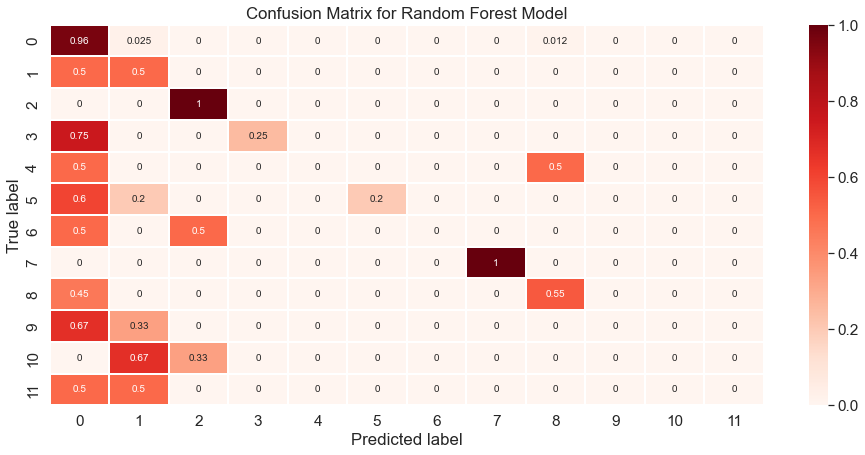

In [6]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')

In [7]:
#List important features descending
features = pd.Series(clf.feature_importances_,index=data_columns).sort_values(ascending=False)
features

heartrate               0.049102
chV1_RPwaveAmp          0.026503
chV6_TwaveAmp           0.020949
chV1_RPwave             0.018322
QRSduration             0.017894
                          ...   
chV3_SPwave             0.000000
chDI_RRwaveExists       0.000000
chV3_RRwaveExists       0.000000
chDII_SPwaveAmp         0.000000
chV6_DD_RRwaveExists    0.000000
Length: 278, dtype: float64

In [8]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.7426470588235294
              precision    recall  f1-score   support

           1       0.77      0.96      0.86        81
           2       0.46      0.50      0.48        12
           3       0.75      1.00      0.86         6
           4       1.00      0.25      0.40         4
           5       0.00      0.00      0.00         4
           6       1.00      0.20      0.33         5
           7       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         3
          10       0.67      0.55      0.60        11
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2

    accuracy                           0.74       136
   macro avg       0.47      0.37      0.38       136
weighted avg       0.68      0.74      0.69       136



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# Run a new model using top 5 features
XX = data[['heartrate', 'chV1_intrinsicReflecttions', 'chAVR_TwaveAmp', 'chV4_TwaveAmp', 'chV5_QRSTA']]
yy = data['class']
          
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
          
clf2=RandomForestClassifier(n_estimators=50, max_depth = 32)
clf2.fit(X_train, y_train)

y_pred=clf2.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

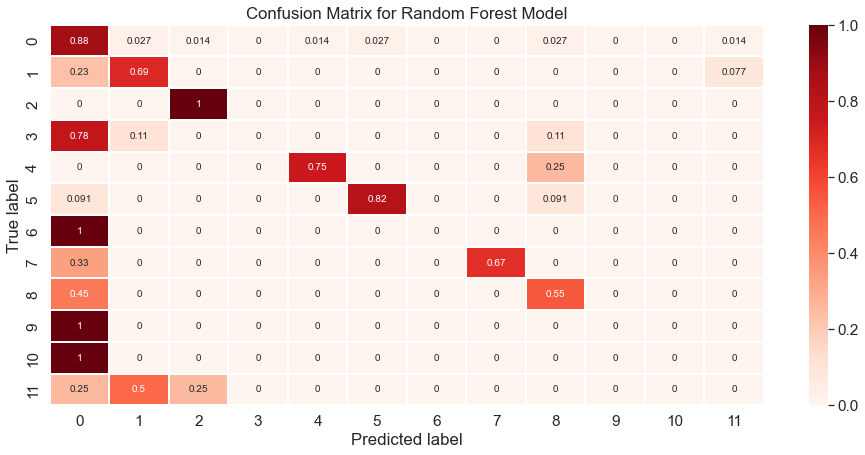

In [10]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')

In [11]:
features = pd.Series(clf2.feature_importances_,index=['heartrate', 'chV1_intrinsicReflecttions', 'chAVR_TwaveAmp', 'chV4_TwaveAmp', 'chV5_QRSTA']).sort_values(ascending=False)
features

heartrate                     0.234803
chV5_QRSTA                    0.208279
chV4_TwaveAmp                 0.195851
chAVR_TwaveAmp                0.190106
chV1_intrinsicReflecttions    0.170961
dtype: float64

In [12]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.7132352941176471
              precision    recall  f1-score   support

           1       0.75      0.88      0.81        74
           2       0.64      0.69      0.67        13
           3       0.60      1.00      0.75         3
           4       0.00      0.00      0.00         9
           5       0.75      0.75      0.75         4
           6       0.82      0.82      0.82        11
           7       0.00      0.00      0.00         2
           9       1.00      0.67      0.80         3
          10       0.55      0.55      0.55        11
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.71       136
   macro avg       0.43      0.45      0.43       136
weighted avg       0.64      0.71      0.67       136



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


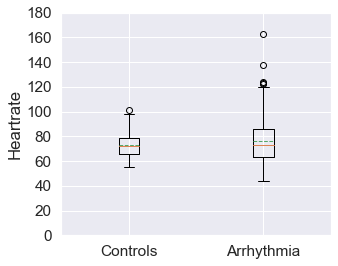

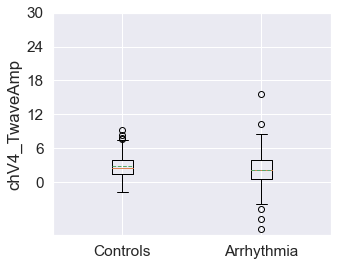

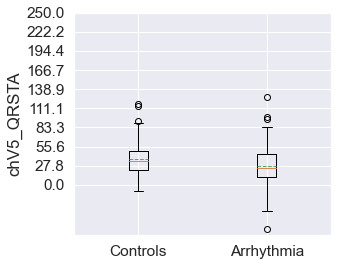

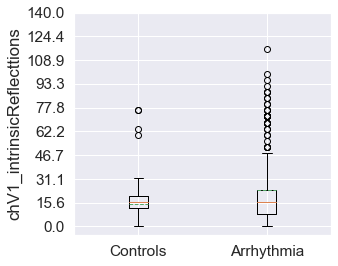

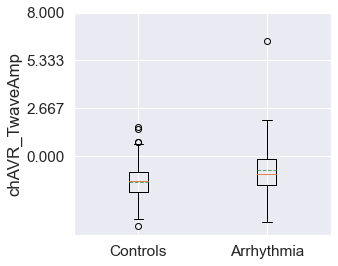

In [13]:
#Comparing top features of people with an arrhythmia and without
arr_ind = (
    (data['class'] > 1)
)

arr_control = data.loc[~arr_ind, 'heartrate'].dropna()
arr_has = data.loc[arr_ind, 'heartrate'].dropna()

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot([arr_control, arr_has], showmeans=True, meanline=True)
ax.set_xticklabels(['Controls', 'Arrhythmia'])
ax.set_yticks(np.linspace(0, 180, 10))
ax.set_ylabel('Heartrate')
fig.tight_layout()

#---------------------------------------------------------#

arr_control_chV4 = data.loc[~arr_ind, 'chV4_TwaveAmp'].dropna()
arr_has_chV4 = data.loc[arr_ind, 'chV4_TwaveAmp'].dropna()

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot([arr_control_chV4, arr_has_chV4], showmeans=True, meanline=True)
ax.set_xticklabels(['Controls', 'Arrhythmia'])
ax.set_yticks(np.linspace(0, 30, 6))
ax.set_ylabel('chV4_TwaveAmp')
fig.tight_layout()

#---------------------------------------------------------#

arr_control_chV5 = data.loc[~arr_ind, 'chV5_QRSTA'].dropna()
arr_has_chV5 = data.loc[arr_ind, 'chV5_QRSTA'].dropna()

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot([arr_control_chV5, arr_has_chV5], showmeans=True, meanline=True)
ax.set_xticklabels(['Controls', 'Arrhythmia'])
ax.set_yticks(np.linspace(0, 250, 10))
ax.set_ylabel('chV5_QRSTA')
fig.tight_layout()

#---------------------------------------------------------#

arr_control_chV1 = data.loc[~arr_ind, 'chV1_intrinsicReflecttions'].dropna()
arr_has_chV1 = data.loc[arr_ind, 'chV1_intrinsicReflecttions'].dropna()

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot([arr_control_chV1, arr_has_chV1], showmeans=True, meanline=True)
ax.set_xticklabels(['Controls', 'Arrhythmia'])
ax.set_yticks(np.linspace(0, 140, 10))
ax.set_ylabel('chV1_intrinsicReflecttions')
fig.tight_layout()

#---------------------------------------------------------#

arr_control_chAVR = data.loc[~arr_ind, 'chAVR_TwaveAmp'].dropna()
arr_has_chAVR = data.loc[arr_ind, 'chAVR_TwaveAmp'].dropna()

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot([arr_control_chAVR, arr_has_chAVR], showmeans=True, meanline=True)
ax.set_xticklabels(['Controls', 'Arrhythmia'])
ax.set_yticks(np.linspace(0, 8, 4))
ax.set_ylabel('chAVR_TwaveAmp')
fig.tight_layout()

In [14]:
print('Heartrate of peope with and without an arrythmia \nt={:.2f}, p={:.2e}\n'.format(
    *stats.ttest_ind(arr_control, arr_has, equal_var=False, alternative='two-sided')  # test for heartrate
))
print('chV4_TwaveAmp of peope with and without an arrythmia \nt={:.2f}, p={:.2e}\n'.format(
    *stats.ttest_ind(arr_control_chV4, arr_has_chV4, equal_var=False, alternative='two-sided')  # test for chV4_TwaveAmp
))
print('chV5_QRSTA of peope with and without an arrythmia \nt={:.2f}, p={:.2e}\n'.format(
    *stats.ttest_ind(arr_control_chV5, arr_has_chV5, equal_var=False, alternative='two-sided')  # test for chV5_QRSTA
))
print('chV1_intrinsicReflecttions of peope with and without an arrythmia \nt={:.2f}, p={:.2e}\n'.format(
    *stats.ttest_ind(arr_control_chV1, arr_has_chV1, equal_var=False, alternative='two-sided')  # test for chV1_intrinsicReflecttions
))
print('chAVR_TwaveAmp of peope with and without an arrythmia \nt={:.2f}, p={:.2e}\n'.format(
    *stats.ttest_ind(arr_control_chAVR, arr_has_chAVR, equal_var=False, alternative='two-sided')  # test for chAVR_TwaveAmp
))

Heartrate of peope with and without an arrythmia 
t=-2.01, p=4.50e-02

chV4_TwaveAmp of peope with and without an arrythmia 
t=2.46, p=1.43e-02

chV5_QRSTA of peope with and without an arrythmia 
t=3.99, p=8.03e-05

chV1_intrinsicReflecttions of peope with and without an arrythmia 
t=-5.08, p=7.19e-07

chAVR_TwaveAmp of peope with and without an arrythmia 
t=-6.29, p=9.98e-10

